# Лабораторная работа №1

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

# 1. Прочитать файл ex1data1.txt
data = pd.read_csv("ex1data1.txt", names=("Population", "Profit"))

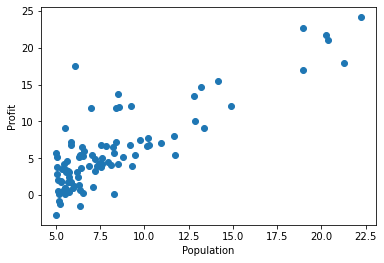

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [3]:
# 2. Построить диаграмму рассеяния
plt.scatter(data[["Population"]], data[["Profit"]])
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

In [35]:
# 3. Реализовать функцию потерь
def loss_function(theta_first, theta_second, training_data=data):
    """
    Функция потерь

    Параметры:
    th_first, th_second : параметры гипотезы
    column_x : вектор независимых переменных
    coumn_y : вектор зависимых переменных
    """
    column_x = training_data.iloc[:, 0].to_numpy()
    column_y = training_data.iloc[:, 1].to_numpy()
    return (((theta_first + column_x * theta_second) - column_y) ** 2).sum() / (2 * column_x.size)

-3.8403293113036274 1.187462932810535


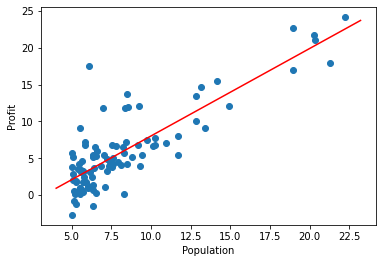

In [36]:
# 4. Реализуйте функцию градиентного спуска
def gradient_descent_step(alfa, theta_first, theta_second, column_x, column_y):
    temp_theta_first = theta_first - alfa * ((theta_first + column_x * theta_second) - column_y).sum() / column_x.size
    temp_theta_second = theta_second - alfa * (((theta_first + column_x * theta_second) - column_y) * column_x).sum() / column_x.size
    return temp_theta_first, temp_theta_second

def gradient_descent(alfa, theta_first, theta_second, training_data = data, epsilon = 0.0001):
    """
    Функция градиентного спуска
    """
    column_x = training_data.iloc[:, 0].to_numpy()
    column_y = training_data.iloc[:, 1].to_numpy()
    while True:
        temp_theta_first, temp_theta_second = gradient_descent_step(alfa, theta_first, theta_second, column_x, column_y)
        if (abs(temp_theta_first - theta_first) <= epsilon) and (abs(temp_theta_second - theta_second) <= epsilon):
            break
        else:
            theta_first = temp_theta_first
            theta_second = temp_theta_second
    return theta_first, theta_second


theta_first_result, theta_second_result = gradient_descent(0.01, 0, 0)
print(theta_first_result, theta_second_result)

# График полученой модели
min_x, max_x = ((data[["Population"]].min() - 1), (data[["Population"]].max() + 1))
plt.scatter(data[["Population"]], data[["Profit"]])
plt.plot([min_x,max_x],[theta_first_result + theta_second_result * min_x,theta_first_result + theta_second_result * max_x], "r")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

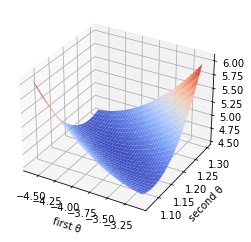

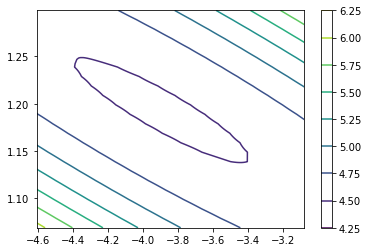

In [37]:
# 5. Трехмерный график функции потерь в виде поверхностей и изолиний
f_range = (theta_first_result*1.2, theta_first_result*.8)
s_range = (theta_second_result*1.1, theta_second_result*.9)
theta_first_grid, theta_second_grid = np.meshgrid(np.arange(min(f_range), max(f_range), 0.01), np.arange(min(s_range), max(s_range), 0.01))
loss_grid = np.vectorize(loss_function)(theta_first_grid, theta_second_grid)

#График в виде поверхности
plt.figure()\
    .add_subplot(111, projection="3d")\
    .plot_surface(theta_first_grid, theta_second_grid, loss_grid, cmap="coolwarm")
plt.xlabel('first θ')
plt.ylabel('second θ')
plt.show()


#График изолиний
fig,ax=plt.subplots()
cp = ax.contour(theta_first_grid, theta_second_grid, loss_grid)
fig.colorbar(cp)
plt.show()

In [38]:
# 6. Загрузите набор данных ex1data2.txt из текстового файла
house_fields = ("Square", "Room number", "Price")
data_house = pd.read_csv("ex1data2.txt", names=house_fields)

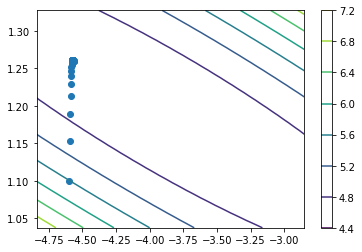

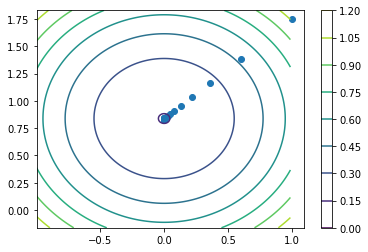

In [39]:
# 7. Произведите нормализацию признаков и постройте график скорости сходимости градиентов
mean = np.array(data_house.mean(axis=0))
s = np.array(np.std(data_house.to_numpy().T, axis=1))
normalized_data_house = pd.DataFrame((data_house.to_numpy() - mean) / s, columns=house_fields)

# Нормализация для ex1data1.txt и построения графика сходимости градиентного спуска
def get_steps(alfa, theta_first, theta_second, data, iterations=40):
    theta_first = [theta_first]
    theta_second = [theta_second]
    for i in range(iterations):
        temp_theta_first, temp_theta_second = gradient_descent_step(alfa, theta_first[-1], theta_second[-1], data.iloc[:, 0].to_numpy(), data.iloc[:, 1].to_numpy())
        theta_first.append(temp_theta_first)
        theta_second.append(temp_theta_second)
    return theta_first, theta_second

def show_contour(theta_first_steps, theta_second_steps, theta_first_grid, theta_second_grid, loss_grid, name = ""):
    fig,ax=plt.subplots()
    cp = ax.contour(theta_first_grid, theta_second_grid, loss_grid)
    ax.scatter(theta_first_steps, theta_second_steps)
    fig.colorbar(cp)
    fig.suptitle(name)
    plt.show()

# График сходимости градиентного спуска до нормализации
f_range = (theta_first_result+1, theta_first_result-1)
s_range = (theta_second_result+0.15, theta_second_result-0.15)
theta_first_grid, theta_second_grid = np.meshgrid(np.arange(min(f_range), max(f_range), 0.01), np.arange(min(s_range), max(s_range), 0.01))
loss_grid = np.vectorize(loss_function)(theta_first_grid, theta_second_grid)
theta_first_steps, theta_second_steps = get_steps(0.004, -4.6, 1.1, data)
show_contour(theta_first_steps, theta_second_steps,  theta_first_grid, theta_second_grid, loss_grid)

# График сходимости градиентного спуска после нормализации
mean = np.array(data.mean(axis=0))
s = np.array(np.std(data.to_numpy().T, axis=1))
normalized_data = pd.DataFrame((data.to_numpy() - mean) / s, columns=("Population","Profit"))
theta_first_result, theta_second_result = gradient_descent(0.4, 1, 1, normalized_data)
f_range = (theta_first_result+1, theta_first_result-1)
s_range = (theta_second_result+1, theta_second_result-1)
theta_first_grid, theta_second_grid = np.meshgrid(np.arange(min(f_range), max(f_range), 0.01), np.arange(min(s_range), max(s_range), 0.01))
loss_grid = np.vectorize(lambda a, b: (((a + normalized_data.iloc[:, 0].to_numpy() * b) - normalized_data.iloc[:, 1].to_numpy()) ** 2).sum() / (2 * len(normalized_data)))(theta_first_grid, theta_second_grid)
theta_first_steps, theta_second_steps = get_steps(0.4, 1, 1.75, normalized_data)

#График изолиний
show_contour(theta_first_steps, theta_second_steps,  theta_first_grid, theta_second_grid, loss_grid)

In [40]:
# 8. Реализуйте функцию с использованием векторизации

def loss_function_many_features(*args, training_data = normalized_data_house):
    """
    Функция потерь для многомерной линейной регресии
    """
    training_data = training_data.to_numpy().T
    hypothesis = args[0]
    for index, theta in enumerate(args[1:]):
        hypothesis = hypothesis + training_data[index] * theta
    return ((hypothesis - training_data[-1])**2).sum() / (2 * len(training_data))

def gradient_descent_many_features(alfa, *args, training_data = normalized_data_house, epsilon = 0.00001):
    """
    Функция градиентного спуска для многомерной линейной регресии
    """
    def get_hypothesis_result(hypothesis_thetas, data):
        hypothesis_result = hypothesis_thetas[0]
        for hypothesis_index, hypothesis_theta in enumerate(hypothesis_thetas[1:]):
            hypothesis_result = hypothesis_result + data[hypothesis_index] * hypothesis_theta
        return hypothesis_result

    size = len(normalized_data_house)
    training_data = training_data.to_numpy().T
    thetas = args[:]
    temp_thetas = []
    while True:
        for index, theta in enumerate(thetas):
            if index == 0:
                temp_theta = theta - alfa * (get_hypothesis_result(thetas, training_data) - training_data[-1]).sum() / size
                temp_thetas.append(temp_theta)
            else:
                temp_theta = theta - alfa * ((get_hypothesis_result(thetas, training_data) - training_data[-1]) * training_data[index-1]).sum() / size
                temp_thetas.append(temp_theta)
        if len([delta for delta in np.array(thetas) - np.array(temp_thetas) if abs(delta) > epsilon]) == 0 :
            thetas = temp_thetas
            break
        else:
            thetas = temp_thetas
            temp_thetas = []
    return thetas

def loss_function_many_features_without_vectorize(*args, training_data = normalized_data_house):
    """
    Функция потерь без векторизации
    """
    sum = 0
    for data in training_data.to_numpy():
        hypothesis = args[0]
        for index, theta in enumerate(args[1:]):
            hypothesis = hypothesis + data[index] * theta
        sum = sum + (hypothesis - data[-1])**2
    return sum / (2 * len(training_data))

def gradient_descent_many_features_without_vectorize(alfa, *args, training_data = normalized_data_house, epsilon = 0.0001):
    """
    Функция градиентного спуска для многомерной линейной регресии без векторизации
    """
    def get_hypothesis_result(hypothesis_thetas, data):
        hypothesis_result = hypothesis_thetas[0]
        for hypothesis_index, hypothesis_theta in enumerate(hypothesis_thetas[1:]):
            hypothesis_result = hypothesis_result + data[hypothesis_index] * hypothesis_theta
        return hypothesis_result

    size = len(normalized_data_house)
    thetas = args[:]
    temp_thetas = []
    while True:
        sum = list(map(lambda a: 0, thetas))
        for data in training_data.to_numpy():
            for index, theta in enumerate(thetas):
                if index == 0:
                    sum[index] = sum[index] + get_hypothesis_result(thetas, data) - data[-1]
                else:
                    sum[index] = sum[index] + (get_hypothesis_result(thetas, data) - data[-1]) * data[index-1]
        for index, theta in enumerate(thetas):
                temp_theta = theta - alfa * sum[index] / size
                temp_thetas.append(temp_theta)
        if len([theta for theta, temp_theta in zip(thetas, temp_thetas) if abs(theta - temp_theta) > epsilon]) == 0 :
            thetas = temp_thetas
            break
        else:
            thetas = temp_thetas
            temp_thetas = []
    return thetas

# Результат ex1data2.txt
thetas_result = gradient_descent_many_features(0.001, 0, 1, 0)
thetas_result

[-6.311086405248156e-17, 0.8998547069791881, -0.06229577030597323]

In [41]:
# 9. Покажите, что векторизация дает прирост производительности.
print("Без векторизации функция потерь")
%timeit loss_function_many_features_without_vectorize(1, 1, 1)
print("С векторизацией функция потерь")
%timeit loss_function_many_features(1, 1, 1)

print("Без векторизации градиентный спуск")
%timeit gradient_descent_many_features_without_vectorize(0.1, 1,1,1)
print("С векторизации градиентный спуск")
%timeit gradient_descent_many_features(0.1, 1,1,1)


Без векторизации функция потерь
141 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
С векторизацией функция потерь
15.7 µs ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Без векторизации градиентный спуск
31.5 ms ± 378 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
С векторизации градиентный спуск
6.29 ms ± 520 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


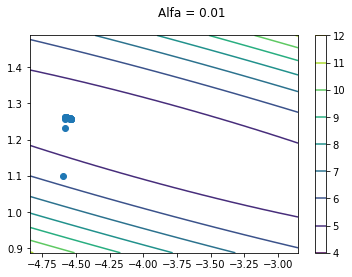

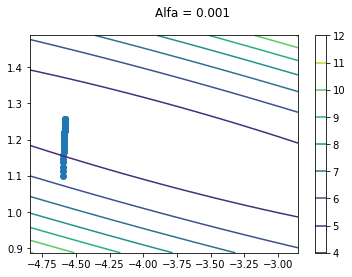

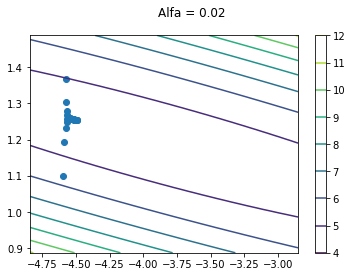

In [42]:
# 10. Попробуйте изменить параметр ɑ
theta_first_result, theta_second_result = gradient_descent(0.01, 0, 0)
f_range = (theta_first_result+1, theta_first_result-1)
s_range = (theta_second_result+0.3, theta_second_result-0.3)
theta_first_grid, theta_second_grid = np.meshgrid(np.arange(min(f_range), max(f_range), 0.01), np.arange(min(s_range), max(s_range), 0.01))
loss_grid = np.vectorize(loss_function)(theta_first_grid, theta_second_grid)

theta_first_steps, theta_second_steps = get_steps(0.01, -4.6, 1.1, data)
show_contour(theta_first_steps, theta_second_steps,  theta_first_grid, theta_second_grid, loss_grid, name="Alfa = 0.01")

theta_first_steps, theta_second_steps = get_steps(0.001, -4.6, 1.1, data)
show_contour(theta_first_steps, theta_second_steps,  theta_first_grid, theta_second_grid, loss_grid, name="Alfa = 0.001")

theta_first_steps, theta_second_steps = get_steps(0.02, -4.6, 1.1, data)
show_contour(theta_first_steps, theta_second_steps,  theta_first_grid, theta_second_grid, loss_grid, name="Alfa = 0.02")

In [43]:
# 11. Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов
X = normalized_data_house.iloc[:, [0, 1]]
y = normalized_data_house.iloc[:, 2].to_numpy()
X.insert(0, "A", [1]*len(X))
X = X.to_numpy()
thetas_analytical_result = np.linalg.inv(X.T @ X) @ X.T @ y

print("Результат функции потерь для аналитического метода",
      loss_function_many_features(thetas_analytical_result[0], thetas_analytical_result[1], thetas_analytical_result[2]))
print("Результат функции потерь для метода градиентного спуска:",loss_function_many_features(thetas_result[0], thetas_result[1], thetas_result[2]))

Результат функции потерь для аналитического метода 2.091930692106838
Результат функции потерь для метода градиентного спуска: 2.0931583836216476
